# 4. [Inspection](https://scikit-learn.org/stable/inspection.html)

La performance prédictive est souvent l'objectif principal du développement de modèles d'apprentissage automatique. Pourtant, résumer les performances avec une métrique d'évaluation est souvent insuffisant : cela suppose que la métrique d'évaluation et l'ensemble de données de test reflètent parfaitement le domaine cible, ce qui est rarement vrai. Dans certains domaines, un modèle a besoin d'un certain niveau d'interprétabilité avant de pouvoir être déployé. Un modèle qui présente des problèmes de performances doit être débogué pour comprendre le problème sous-jacent du modèle. Le module sklearn.inspection fournit des outils pour aider à comprendre les prédictions d'un modèle et ce qui les affecte. Cela peut être utilisé pour évaluer les hypothèses et les biais d'un modèle, concevoir un meilleur modèle ou diagnostiquer les problèmes de performances du modèle.

Exemples:

* Les pièges courants dans l'interprétation des coefficients des modèles linéaires <mark>déjà dans 1_linear_models</mark>

4.1. Graphiques de dépendance partielle et d'espérance conditionnelle individuelle
* 4.1.1. Graphiques de dépendance partielle
* 4.1.2. Diagramme d'espérance conditionnelle individuelle (ICE)
* 4.1.3. Définition mathématique
* 4.1.4. Méthodes de calcul
    
4.2. Importance de la fonction de permutation
* 4.2.1. Aperçu de l'algorithme d'importance de la permutation
* 4.2.2. Relation avec l'importance basée sur les impuretés dans les arbres
* 4.2.3. Valeurs trompeuses sur les caractéristiques fortement corrélées

# 4.1. [Graphiques de dépendance partielle et d'espérance conditionnelle individuelle](https://scikit-learn.org/stable/modules/partial_dependence.html)


Les diagrammes de dépendance partielle (*Partial Dependence Plots* - **PDP**) et les diagrammes d'espérance conditionnelle individuelle (*Individual Conditionnal expectation* - **ICE**) peuvent être utilisés pour visualiser et analyser l'interaction entre la réponse cible (**1**) et un ensemble de caractéristiques d'entrée d'intérêt.

Les PDP ([H2009 - The Elements Of Statistical Learning](https://hastie.su.domains/ElemStatLearn/)) et les ICE ([G2015 - Peeking Inside the Black Box: Visualizing Statistical Learning with Plots of Individual Conditional Expectation](https://arxiv.org/abs/1309.6392)) supposent que les caractéristiques d'entrée d'intérêt sont indépendantes des caractéristiques complémentaires, et cette hypothèse est souvent violée dans la pratique. Ainsi, dans le cas de caractéristiques corrélées, nous créerons des points de données absurdes pour calculer le PDP/ICE ([M2019 - Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/)).

(1): *Pour la classification, la réponse cible peut être la probabilité d'une classe (la classe positive pour la classification binaire) ou la fonction de décision.*

### 4.1.1. Graphiques de dépendance partielle

Les diagrammes de dépendance partielle (PDP) montrent la dépendance entre la réponse cible et un ensemble de caractéristiques d'entrée d'intérêt, en marginalisant les valeurs de toutes les autres caractéristiques d'entrée (les caractéristiques "complémentaires"). Intuitivement, nous pouvons interpréter la dépendance partielle comme la réponse cible attendue en fonction des caractéristiques d'entrée d'intérêt.

En raison des limites de la perception humaine, la taille de l'ensemble des caractéristiques d'entrée d'intérêt doit être petite (généralement, une ou deux), ainsi les caractéristiques d'entrée d'intérêt sont généralement choisies parmi les caractéristiques les plus importantes.

La figure ci-dessous montre deux diagrammes de dépendance partielle à sens unique (*one-way*) et un à double sens (*two-way*) pour l'ensemble de données sur le logement en Californie, avec un [`HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor) :

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_003.png)

Les PDP unidirectionnels nous renseignent sur l'interaction entre la réponse cible et une caractéristique d'entrée d'intérêt (par exemple, linéaire, non linéaire). Le graphique de gauche dans la figure ci-dessus montre l'effet de l'occupation moyenne sur le prix médian des maisons ; on observe clairement une relation linéaire entre eux lorsque l'occupation moyenne est inférieure à 3 personnes. De même, nous pourrions analyser l'effet de l'âge du logement sur le prix médian du logement (graphique du milieu). Ainsi, ces interprétations sont marginales, considérant une caractéristique à la fois.

Les PDP avec deux caractéristiques d'entrée d'intérêt montrent les interactions entre les deux caractéristiques. Par exemple, le PDP à deux variables dans la figure ci-dessus montre la dépendance du prix médian du logement sur les valeurs conjointes de l'âge du logement et du nombre moyen d'occupants par ménage. On voit bien une interaction entre les deux caractéristiques : pour une occupation moyenne supérieure à deux, le prix du logement est quasiment indépendant de l'âge du logement, alors que pour des valeurs inférieures à 2 il y a une forte dépendance à l'âge.

Le module [`sklearn.inspection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.inspection) fournit une fonction pratique [`from_estimator`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) pour créer des tracés de dépendance partielle unidirectionnels et bidirectionnels. Dans l'exemple ci-dessous, nous montrons comment créer une grille de tracés de dépendance partielle : deux PDP unidirectionnels pour les caractéristiques 0 et 1 et un PDP bidirectionnel entre les deux caractéristiques :

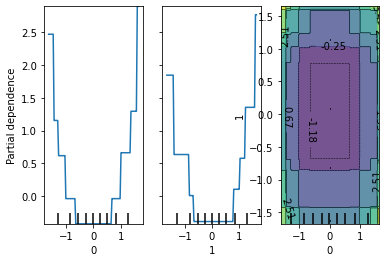

In [3]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
features = [0, 1, (0, 1)]
PartialDependenceDisplay.from_estimator(clf, X, features)

import matplotlib.pyplot as plt
plt.show()

Vous pouvez accéder aux objets figure et Axes nouvellement créés en utilisant `plt.gcf()` et `plt.gca()`.

Pour la classification multi-classes, vous devez définir l'étiquette de classe pour laquelle les PDP doivent être créés via l'argument `target` :

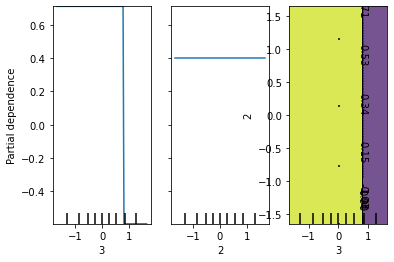

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10, max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
PartialDependenceDisplay.from_estimator(mc_clf, X, features, target=0)
plt.show()

La même paramètre `target` est utilisée pour spécifier la cible dans les paramètres de régression à sorties multiples.

Si vous avez besoin des valeurs brutes de la fonction de dépendance partielle plutôt que des tracés, vous pouvez utiliser la fonction [`sklearn.inspection.partial_dependence`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.partial_dependence.html#sklearn.inspection.partial_dependence) :

In [5]:
from sklearn.inspection import partial_dependence

results = partial_dependence(clf, X, [0])
results["average"]
# array([[ 2.466...,  2.466..., ...
results["values"]

[array([-1.62497055, -1.59201391, -1.55905727, -1.52610063, -1.493144  ,
        -1.46018736, -1.42723072, -1.39427408, -1.36131745, -1.32836081,
        -1.29540417, -1.26244753, -1.22949089, -1.19653426, -1.16357762,
        -1.13062098, -1.09766434, -1.06470771, -1.03175107, -0.99879443,
        -0.96583779, -0.93288115, -0.89992452, -0.86696788, -0.83401124,
        -0.8010546 , -0.76809797, -0.73514133, -0.70218469, -0.66922805,
        -0.63627141, -0.60331478, -0.57035814, -0.5374015 , -0.50444486,
        -0.47148823, -0.43853159, -0.40557495, -0.37261831, -0.33966167,
        -0.30670504, -0.2737484 , -0.24079176, -0.20783512, -0.17487849,
        -0.14192185, -0.10896521, -0.07600857, -0.04305193, -0.0100953 ,
         0.02286134,  0.05581798,  0.08877462,  0.12173126,  0.15468789,
         0.18764453,  0.22060117,  0.25355781,  0.28651444,  0.31947108,
         0.35242772,  0.38538436,  0.418341  ,  0.45129763,  0.48425427,
         0.51721091,  0.55016755,  0.58312418,  0.6

Les valeurs auxquelles la dépendance partielle doit être évaluée sont directement générées à partir de `X`. Pour une dépendance partielle à 2 facteurs, une grille 2D de valeurs est générée. Le champ de `valeurs` renvoyé par [`sklearn.inspection.partial_dependence`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.partial_dependence.html#sklearn.inspection.partial_dependence) donne les valeurs réelles utilisées dans la grille pour chaque caractéristique d'entrée d'intérêt. Ils correspondent également à l'axe des tracés.

### 4.1.2. Diagramme d'espérance conditionnelle individuelle (ICE)

Semblable à un PDP, un graphique d'attente conditionnelle individuelle (ICE) montre la dépendance entre la fonction cible et une caractéristique d'entrée d'intérêt. Cependant, contrairement à un PDP, qui montre l'effet moyen de la caractéristique d'entrée, un tracé ICE visualise la dépendance de la prédiction sur une caractéristique pour chaque échantillon séparément avec une ligne par échantillon. En raison des limites de la perception humaine, une seule caractéristique d'entrée d'intérêt est prise en charge pour les tracés ICE.

Les figures ci-dessous montrent quatre tracés ICE pour l'ensemble de données sur le logement en Californie, avec un [`HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor). La deuxième figure trace la ligne PD correspondante superposée sur les lignes ICE.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_partial_dependence_001.png)

Alors que les PDP sont bons pour montrer l'effet moyen des caractéristiques cibles, ils peuvent masquer une relation hétérogène créée par les interactions. Lorsque des interactions sont présentes, le graphique ICE fournira beaucoup plus d'informations. Par exemple, nous pourrions observer une relation linéaire entre le revenu médian et le prix de l'immobilier dans la ligne PD. Cependant, les lignes ICE montrent qu'il existe quelques exceptions, où le prix de l'immobilier reste constant dans certaines fourchettes du revenu médian.

La fonction de commodité [`PartialDependenceDisplay.from_estimator`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html#sklearn.inspection.PartialDependenceDisplay.from_estimator) du module [`sklearn.inspection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.inspection) peut être utilisée pour créer des tracés ICE en définissant `kind='individual'`. Dans l'exemple ci-dessous, nous montrons comment créer une grille de tracés ICE :

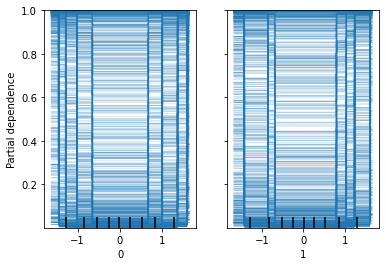

In [6]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
features = [0, 1]
PartialDependenceDisplay.from_estimator(clf, X, features, kind='individual')
plt.show()


Dans les tracés ICE, il peut être difficile de voir l'effet moyen de la caractéristique d'entrée qui vous intéresse. Par conséquent, il est recommandé d'utiliser des diagrammes ICE parallèlement aux PDP. Ils peuvent être tracés avec `kind='both'`.

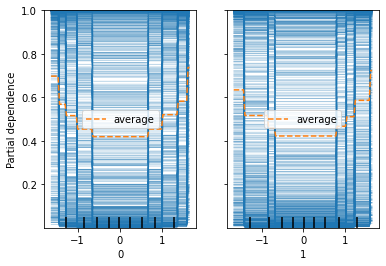

In [8]:
PartialDependenceDisplay.from_estimator(clf, X, features, kind='both')
plt.show()

S'il y a trop de lignes dans un graphique ICE, il peut être difficile de voir les différences entre les échantillons individuels et d'interpréter le modèle. Le centrage de l'ICE sur la première valeur sur l'axe des x produit des tracés centrés de l'espérance conditionnelle individuelle (cICE) [G2015](https://arxiv.org/abs/1309.6392). Cela met l'accent sur la divergence des attentes conditionnelles individuelles par rapport à la ligne moyenne, ce qui facilite l'exploration des relations hétérogènes. Les diagrammes cICE peuvent être tracés en définissant `centered=True` :

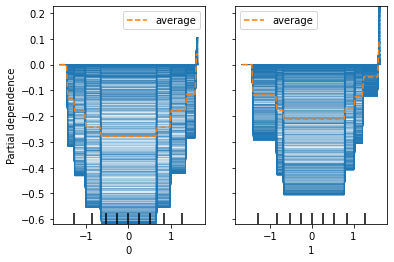

In [9]:
PartialDependenceDisplay.from_estimator(clf, X, features, kind='both', centered=True)
plt.show()

### 4.1.3. Définition mathématique

Soit $X_S$ l'ensemble des caractéristiques d'entrée d'intérêt (c'est-à-dire le paramètre `features`) et soit $X_C$ son complément.

La dépendance partielle de la réponse $f$ à un point $x_S$ est définie comme:

$$
\begin{split}
    pd_{X_S}(x_S) &\overset{def}{=} \mathbb{E}_{X_C}\left[ f(x_S, X_C) \right]\\
    &= \int f(x_S, x_C) p(x_C) dx_C,
\end{split}
$$

où $f(x_S, x_C)$ est la fonction de réponse ([predict](https://scikit-learn.org/stable/glossary.html#term-predict), [predict_proba](https://scikit-learn.org/stable/glossary.html#term-predict_proba) ou [decision_function](https://scikit-learn.org/stable/glossary.html#term-decision_function)) pour un échantillon donné dont les valeurs sont définies par $x_S$ pour les caractéristiques dans $X_S$, et par $x_C$ pour les caractéristiques dans $X_C$. Notez que $x_S$ et $x_C$ peuvent être des tuples.

Le calcul de cette intégrale pour différentes valeurs de $x_S$ produit un tracé PDP comme ci-dessus. Une ligne ICE est définie comme un seul $f(x_S, x^{(i)}_C)$ évalué à $x_S$.

### 4.1.4 Méthodes de calcul

Il existe deux méthodes principales pour approximer l'intégrale ci-dessus, à savoir les méthodes "brute" et "récursive". Le paramètre `method` contrôle la méthode à utiliser.

La méthode "brute" est une méthode générique qui fonctionne avec n'importe quel estimateur. Notez que le calcul des tracés ICE n'est pris en charge qu'avec la méthode "brute". Il se rapproche de l'intégrale ci-dessus en calculant une moyenne sur les données `X` :

$$
pd_{X_S}(x_S) \approx \frac{1}{n_\text{samples}} \sum_{i=1}^n f(x_S, x_C^{(i)}),
$$

où $x_C^{(i)}$ est la valeur du ième échantillon pour les entités dans $X_C$. Pour chaque valeur de $x_S$, cette méthode nécessite un passage complet sur l'ensemble de données `X` qui est gourmand en calculs.

Chacun des $f(x_{S}, x_{C}^{(i)})$ correspond à une ligne ICE évaluée à $x_S$. En calculant ceci pour plusieurs valeurs de $x_S$, on obtient une ligne ICE complète. Comme on peut le voir, la moyenne des lignes ICE correspond à la ligne de dépendance partielle.

La méthode «récursive» est plus rapide que la méthode «brute», mais elle n'est prise en charge que pour les diagrammes PDP par certains estimateurs basés sur des arbres. Il est calculé comme suit. Pour un point donné $x_S$, un parcours d'arbre pondéré est effectué : si un nœud divisé implique une caractéristique d'entrée d'intérêt, la branche gauche ou droite correspondante est suivie ; sinon, les deux branches sont suivies, chaque branche étant pondérée par la fraction d'échantillons d'apprentissage qui sont entrés dans cette branche. Enfin, la dépendance partielle est donnée par une moyenne pondérée de toutes les valeurs de feuilles visitées.

Avec la méthode ‘brute’, le paramètre `X` est utilisé à la fois pour générer la grille de valeurs $x_S$ et les valeurs des caractéristiques complémentaires $x_C$. Cependant avec la méthode « récursive », `X` n'est utilisé que pour les valeurs de la grille : implicitement, les valeurs $x_C$ sont celles des données d'apprentissage.

Par défaut, la méthode «récursive» est utilisée pour tracer les PDP sur des estimateurs arborescents qui la prennent en charge, et la méthode «brute» est utilisée pour le reste.

**NB** : Bien que les deux méthodes devraient être proches en général, elles peuvent différer suivant certains paramètres spécifiques. La méthode "brute" suppose l'existence des points de données $(x_{S}, x_{C}^{(i)})$. Lorsque les caractéristiques sont corrélées, ces échantillons artificiels peuvent avoir une masse de probabilité très faible. Les méthodes « brute » et « récursive » seront probablement en désaccord sur la valeur de la dépendance partielle, car elles traiteront différemment ces échantillons improbables. Rappelez-vous, cependant, que l'hypothèse principale pour l'interprétation des PDP est que les caractéristiques doivent être indépendantes.

### [**Exemple ⭐⭐⭐⭐** : Graphiques de dépendance partielle et d'espérance conditionnelle individuelle](https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py)

Les diagrammes de dépendance partielle montrent la dépendance entre la fonction cible [2] et un ensemble de caractéristiques d'intérêt, en marginalisant les valeurs de toutes les autres caractéristiques (les caractéristiques complémentaires). En raison des limites de la perception humaine, la taille de l'ensemble des caractéristiques d'intérêt doit être petite (généralement, une ou deux), elles sont donc généralement choisies parmi les caractéristiques les plus importantes.

De même, un graphique d'espérance conditionnelle individuelle (ICE) [3] montre la dépendance entre la fonction cible et une caractéristique d'intérêt. Cependant, contrairement aux diagrammes de dépendance partielle, qui montrent l'effet moyen des caractéristiques d'intérêt, les diagrammes ICE visualisent la dépendance de la prédiction sur une caractéristique pour chaque échantillon séparément, avec une ligne par [échantillon](https://scikit-learn.org/stable/glossary.html#term-sample). Une seule caractéristique d'intérêt est prise en charge pour les tracés ICE.

Cet exemple montre comment obtenir une dépendance partielle et des tracés ICE à partir d'un [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) et d'un [`HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor) formés sur l'ensemble de données de logement en Californie. L'exemple est tiré de [1].


[1] T. Hastie, R. Tibshirani and J. Friedman, “Elements of Statistical Learning Ed. 2”, Springer, 2009.

[2] Pour la classification, vous pouvez le considérer comme le score de régression avant la fonction de lien.

[3] Goldstein, A., Kapelner, A., Bleich, J., and Pitkin, E. (2015). [“Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation”](https://arxiv.org/abs/1309.6392). Journal of Computational and Graphical Statistics, 24(1): 44-65

#### Prétraitement des données sur le logement en Californie

Centrer la cible pour éviter le biais d'initialisation du gradient boosting : le gradient boosting avec la méthode "récursion" ne tient pas compte de l'estimateur initial (ici la cible moyenne, par défaut).

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#### Dépendance partielle unidirectionnelle avec différents modèles

Dans cette section, nous allons calculer la dépendance partielle à 1 facteur avec deux modèles d'apprentissage automatique différents : (i) un perceptron multicouche et (ii) un gradient-boosting. Avec ces deux modèles, nous illustrons comment calculer et interpréter à la fois le diagramme de dépendance partielle (PDP) et l'espérance conditionnelle individuelle (ICE).

##### Perceptron multicouche

Ajustons un [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) et calculons des diagrammes de dépendance partielle à variable unique.

In [2]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

print("Training MLPRegressor...")
tic = time()
est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(30, 15),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    ),
)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training MLPRegressor...
done in 5.608s
Test R2 score: 0.82


Nous avons configuré un pipeline pour mettre à l'échelle les caractéristiques numériques d'entrée et réglé la taille du réseau de neurones et le taux d'apprentissage pour obtenir un compromis raisonnable entre le temps d'apprentissage et les performances prédictives sur un ensemble de test.

Il est important de noter que cet ensemble de données tabulaires a des plages dynamiques très différentes pour ses caractéristiques. Les réseaux de neurones ont tendance à être très sensibles aux caractéristiques avec des échelles variables et oublier de prétraiter la caractéristique numérique conduirait à un modèle très médiocre.

Il serait possible d'obtenir des performances prédictives encore plus élevées avec un réseau de neurones plus important, mais l'apprentissage serait également beaucoup plus coûteux.

Notez qu'il est important de vérifier que le modèle est suffisamment précis sur un ensemble de test avant de tracer la dépendance partielle car il serait peu utile d'expliquer l'impact d'une caractéristique donnée sur la fonction de prédiction d'un modèle médiocre.

Nous tracerons la dépendance partielle, à la fois individuelle (ICE) et moyenne (PDP). Nous limitons à seulement 50 courbes ICE pour ne pas surcharger le diagramme.

Computing partial dependence plots...
done in 7.213s


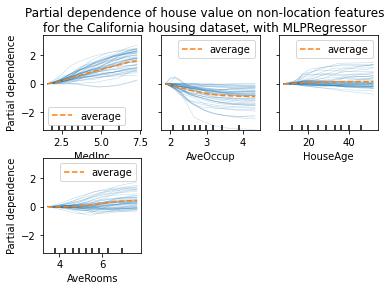

In [3]:
from sklearn.inspection import PartialDependenceDisplay

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "centered": True,
    "random_state": 0,
}

print("Computing partial dependence plots...")
tic = time()
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features=["MedInc", "AveOccup", "HouseAge", "AveRooms"],
    kind="both",
    **common_params,
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with MLPRegressor"
)
display.figure_.subplots_adjust(hspace=0.3)

##### Amplification de gradient

Ajustons maintenant un [`HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor) et calculons la dépendance partielle sur les mêmes fonctionnalités.

In [4]:
from sklearn.ensemble import HistGradientBoostingRegressor

print("Training HistGradientBoostingRegressor...")
tic = time()
est = HistGradientBoostingRegressor(random_state=0)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.2f}")

Training HistGradientBoostingRegressor...
done in 1.531s
Test R2 score: 0.85


Ici, nous avons utilisé les hyperparamètres par défaut pour le modèle d'amplification de gradient sans aucun prétraitement, car les modèles arborescents sont naturellement robustes aux transformations monotones des caractéristiques numériques.

Notez que sur cet ensemble de données tabulaires, les Gradient Boosting Machines sont à la fois beaucoup plus rapides à entraîner et plus précises que les réseaux de neurones. Il est également beaucoup moins cher de régler leurs hyperparamètres (les valeurs par défaut ont tendance à bien fonctionner alors que ce n'est pas souvent le cas pour les réseaux de neurones).

Nous tracerons la dépendance partielle, à la fois individuelle (ICE) et moyenne (PDP). Nous limitons à seulement 50 courbes ICE pour ne pas surcharger la parcelle.

Computing partial dependence plots...
done in 4.205s


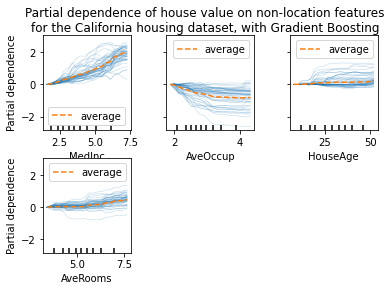

In [5]:
print("Computing partial dependence plots...")
tic = time()
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features=["MedInc", "AveOccup", "HouseAge", "AveRooms"],
    kind="both",
    **common_params,
)
print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with Gradient Boosting"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

##### Analyse des diagrammes

Nous pouvons clairement voir sur les PDP (ligne orange en pointillés) que le prix médian des maisons montre une relation linéaire avec le revenu médian (en haut à gauche) et que le prix des maisons baisse lorsque le nombre moyen d'occupants par ménage augmente (en haut au milieu). Le graphique en haut à droite montre que l'âge du logement dans un quartier n'a pas une forte influence sur le prix (médian) du logement ; il en va de même pour le nombre moyen de pièces par ménage.

Les courbes ICE (lignes bleu clair) complètent l'analyse : on peut voir qu'il existe quelques exceptions (qui sont mieux mises en évidence avec l'option `centered=True`), où le prix du logement reste constant par rapport aux variations du revenu médian et des occupants moyens. D'autre part, alors que l'âge du logement (en haut à droite) n'a pas une forte influence sur le prix médian du logement en moyenne, il semble y avoir un certain nombre d'exceptions où le prix du logement augmente entre 15 et 25 ans. Des exceptions similaires peuvent être observées pour le nombre moyen de chambres (en bas à gauche). Par conséquent, les diagrammes ICE montrent certains effets individuels qui sont atténués en prenant les moyennes.

Dans tous les tracés, les graduations sur l'axe des x représentent les déciles des valeurs des caractéristiques dans les données d'apprentissage.

Nous observons également que le [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) a des prédictions beaucoup plus fluides que [`HistGradientBoostingRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingRegressor.html#sklearn.ensemble.HistGradientBoostingRegressor).

Cependant, il convient de noter que nous créons des échantillons synthétiques potentiels sans signification si les caractéristiques sont corrélées.

#### Graphiques d'interaction 2D

Les PDP avec deux caractéristiques d'intérêt nous permettent de visualiser les interactions entre eux. Cependant, les ICE ne peuvent pas être tracés de manière simple et donc interprétés. Une autre considération est liée à la performance pour calculer les PDP. Avec l'algorithme basé sur l'arbre, lorsque seuls les PDP sont demandés, ils peuvent être calculés de manière efficace en utilisant la méthode de `'récursion'`.

Computing partial dependence plots...
done in 6.121s


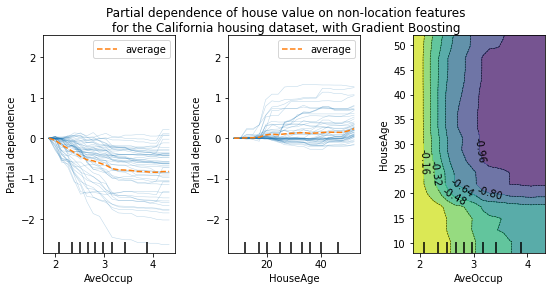

In [6]:
import matplotlib.pyplot as plt

print("Computing partial dependence plots...")
tic = time()
_, ax = plt.subplots(ncols=3, figsize=(9, 4))

# Note that we could have called the method `from_estimator` three times and
# provide one feature, one kind of plot, and one axis for each call.
display = PartialDependenceDisplay.from_estimator(
    est,
    X_train,
    features=["AveOccup", "HouseAge", ("AveOccup", "HouseAge")],
    kind=["both", "both", "average"],
    ax=ax,
    **common_params,
)

print(f"done in {time() - tic:.3f}s")
display.figure_.suptitle(
    "Partial dependence of house value on non-location features\n"
    "for the California housing dataset, with Gradient Boosting"
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

Le diagramme de dépendance partielle à deux facteurs montre la dépendance du prix médian des maisons aux valeurs conjointes de l'âge des maisons et des occupants moyens par ménage. On voit bien une interaction entre les deux caractéristiques : pour une occupation moyenne supérieure à deux, le prix du logement est quasiment indépendant de l'âge du logement, alors que pour des valeurs inférieures à deux il y a une forte dépendance à l'âge.

#### Graphiques d'interaction 3D

Faisons le même graphique de dépendance partielle pour l'interaction de 2 caractéristiques, cette fois en 3 dimensions.

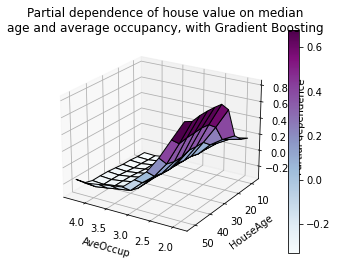

In [7]:
import numpy as np

# unused but required import for doing 3d projections with matplotlib < 3.2
# import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.inspection import partial_dependence

fig = plt.figure()

features = ("AveOccup", "HouseAge")
pdp = partial_dependence(
    est, X_train, features=features, kind="average", grid_resolution=10
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel("Partial dependence")
# pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle(
    "Partial dependence of house value on median\n"
    "age and average occupancy, with Gradient Boosting"
)
plt.subplots_adjust(top=0.9)
plt.show()

## Références

[H2009] T. Hastie, R. Tibshirani and J. Friedman, The Elements of Statistical Learning, Second Edition, Section 10.13.2, Springer, 2009.

[M2019] C. Molnar, Interpretable Machine Learning, Section 5.1, 2019.

[G2015] (1,2) A. Goldstein, A. Kapelner, J. Bleich, and E. Pitkin, “Peeking Inside the Black Box: Visualizing Statistical Learning With Plots of Individual Conditional Expectation” Journal of Computational and Graphical Statistics, 24(1): 44-65, Springer, 2015.


# 4.2. [Importance des caractéristiques de permutation](https://scikit-learn.org/stable/modules/permutation_importance.html)

L'importance des caractéristiques de permutation est une technique d'inspection de modèle qui peut être utilisée pour tout [estimateur](https://scikit-learn.org/stable/glossary.html#term-estimator) [ajusté](https://scikit-learn.org/stable/glossary.html#term-fitted) lorsque les données sont tabulaires. Ceci est particulièrement utile pour les estimateurs non linéaires ou opaques. L'importance de la caractéristique de permutation est définie comme étant la diminution du score d'un modèle lorsqu'une seule valeur de caractéristique est mélangée de manière aléatoire [1]. Cette procédure rompt la relation entre la caractéristique et la cible, ainsi la baisse du score du modèle indique à quel point le modèle dépend de la caractéristique. Cette technique bénéficie du fait qu'elle est indépendante du modèle et peut être calculée plusieurs fois avec différentes permutations de la caractéristique.

**Avertissement** Les caractéristiques jugées **peu importantes pour un mauvais modèle** (faible score de validation croisée) pourraient être **très importantes pour un bon modèle**. Par conséquent, il est toujours important d'évaluer le pouvoir prédictif d'un modèle à l'aide d'un ensemble retenu (ou mieux avec une validation croisée) avant de calculer les importances. L'importance de la permutation ne reflète pas la valeur prédictive intrinsèque d'une caractéristique en elle-même, mais l'**importance de cette caractéristique pour un modèle particulier**.

La fonction [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) calcule l'importance des caractéristiques des [estimateurs]() pour un jeu de données donné. Le paramètre `n_repeats` définit le nombre de fois qu'une fonctionnalité est mélangée de manière aléatoire et renvoie un échantillon d'importance des fonctionnalités.

Considérons le modèle de régression entraîné suivant :

In [8]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.3566675322939422

Ses performances de validation, mesurées via le score $R^2$, sont nettement supérieures au niveau de chance. Cela permet d'utiliser la fonction [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) pour sonder quelles caractéristiques sont les plus prédictives :

In [9]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023


Notez que les valeurs d'importance pour les principales caractéristiques représentent une grande partie du score de référence de 0,356.

Les importances de permutation peuvent être calculées soit sur l'ensemble d'apprentissage, soit sur un ensemble de test ou de validation retenu. L'utilisation d'un ensemble retenu permet de mettre en évidence les caractéristiques qui contribuent le plus au pouvoir de généralisation du modèle inspecté. Les caractéristiques qui sont importantes sur l'ensemble d'entraînement mais pas sur l'ensemble retenu peuvent entraîner un surajustement du modèle.

L'importance de la caractéristique de permutation est la diminution du score d'un modèle lorsqu'une seule valeur de caractéristique est mélangée de manière aléatoire. La fonction de score à utiliser pour le calcul des importances peut être spécifiée avec l'argument `scoring`, qui accepte également plusieurs évaluateurs. L'utilisation de plusieurs évaluateurs est plus efficace en termes de calcul que l'appel séquentiel de [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) plusieurs fois avec un évaluateur différent, car il réutilise les prédictions du modèle.

Un exemple d'utilisation de plusieurs évaluateurs est illustré ci-dessous, utilisant une liste de métriques, mais d'autres formats d'entrée sont possibles, comme documenté dans [Utilisation de l'évaluation de plusieurs métriques](https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring).

In [10]:
scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
r_multi = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0, scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"    {diabetes.feature_names[i]:<8}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    s5      0.204 +/- 0.050
    bmi     0.176 +/- 0.048
    bp      0.088 +/- 0.033
    sex     0.056 +/- 0.023
neg_mean_absolute_percentage_error
    s5      0.081 +/- 0.020
    bmi     0.064 +/- 0.015
    bp      0.029 +/- 0.010
neg_mean_squared_error
    s5      1013.866 +/- 246.445
    bmi     872.726 +/- 240.298
    bp      438.663 +/- 163.022
    sex     277.376 +/- 115.123


Le classement des caractéristiques est approximativement le même pour différentes métriques même si les échelles des valeurs d'importance sont très différentes. Cependant, cela n'est pas garanti et des métriques différentes peuvent conduire à des importances de caractéristiques significativement différentes, en particulier pour les modèles entraînés pour des problèmes de classification déséquilibrés, pour lesquels le choix de la métrique de classification peut être critique.

## 4.2.1. Aperçu de l'algorithme d'importance de permutation

* Entrées : modèle prédictif ajusté $m$, jeu de données tabulaire (apprentissage ou validation) $D$.
* Calculer le score de référence $s$ du modèle $m$ sur les données $D$ (par exemple la précision d'un classifieur ou le $R^2$ pour un régresseur).
* Pour chaque caractéristique $j$ (colonne de $D$):
     * A chaque répétition $k$ dans $1, \cdots, K$.
          * Mélanger au hasard la colonne $j$ de l'ensemble de données $D$ pour générer une version corrompue des données nommée $\tilde{D}_{k,j}$.
          * Calculer le score $s_{k,j}$ du modèle sur des données corrompues $\tilde{D}_{k,j}$.
     * Calculer l'importance $i_j$ pour la caractéristique $f_j$ définie comme:

$$
i_j = s - \frac{1}{K} \sum_{k=1}^{K} s_{k,j}
$$

## 4.2.2. Relation avec l'importance basée sur les impuretés dans les arbres

Les modèles arborescents fournissent une autre mesure de l'importance des caractéristiques basée sur la diminution moyenne des impuretés (MDI). L'impureté est quantifiée par le critère de découpage des arbres de décision (Gini, Log Loss ou Mean Squared Error). Cependant, cette méthode peut accorder une grande importance aux caractéristiques qui peuvent ne pas être prédictives sur des données invisibles lorsque le modèle est surajusté. L'importance des caractéristiques basée sur la permutation, en revanche, évite ce problème, car elle peut être calculée sur des données invisibles.

De plus, l'importance des caractéristiques basées sur les impuretés pour les arbres est **fortement biaisée** et **favorise les caractéristiques de cardinalité élevée** (généralement des caractéristiques numériques) par rapport aux caractéristiques de faible cardinalité telles que les caractéristiques binaires ou les variables catégorielles avec un petit nombre de catégories possibles.

Les importances des caractéristiques basées sur la permutation ne présentent pas un tel biais. De plus, l'importance de la caractéristique de permutation peut être une métrique de performance calculée sur les prédictions du modèle et peut être utilisée pour analyser n'importe quelle classe de modèle (pas seulement des modèles basés sur des arbres).

L'exemple suivant met en évidence les limites de l'importance des caractéristiques basée sur les impuretés par opposition à l'importance des caractéristiques basée sur la permutation : [Permutation Importance vs Random Forest Feature Importance (MDI)](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py).

## 4.2.3. Valeurs trompeuses sur les caractéristiques fortement corrélées

Lorsque deux caractéristiques sont corrélées et que l'une des caractéristiques est permutée, le modèle aura toujours accès à la caractéristique via sa caractéristique corrélée. Cela se traduira par une valeur d'importance inférieure pour les deux caractéristiques, où elles pourraient en fait être importantes.

Une façon de gérer cela consiste à regrouper les caractéristiques qui sont corrélées et à ne conserver qu'une seule caractéristique de chaque cluster. Cette stratégie est explorée dans l'exemple suivant : [Importance de la permutation avec des entités multicolinéaires ou corrélées](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py).

## Exemple A : [Permutation Importance vs Random Forest Feature Importance (MDI)](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py)

Dans cet exemple, nous allons comparer l'importance des caractéristiques basée sur les impuretés de [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) avec l'importance de la permutation sur l'ensemble de données titanesque à l'aide de [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance). Nous montrerons que l'importance des caractéristiques basées sur les impuretés peut gonfler l'importance des caractéristiques numériques.

De plus, l'importance des caractéristiques basée sur les impuretés des forêts aléatoires souffre du fait qu'elle est calculée sur des statistiques dérivées de l'ensemble de données d'apprentissage : les importances peuvent être élevées même pour les caractéristiques qui ne sont pas prédictives de la variable cible, tant que le modèle a la capacité d'utiliser qu'ils soient suréquipés.

Cet exemple montre comment utiliser Permutation Importances comme alternative pouvant atténuer ces limitations.

**Référence** - [L. Breiman, “Random Forests”, Machine Learning, 45(1), 5-32, 2001](https://link.springer.com/content/pdf/10.1023/A:1010933404324.pdf).

In [ ]:
import numpy as np

### Chargement de données et ingénierie des caractéristiques

Utilisons pandas pour charger une copie du jeu de données "titanic". Ce qui suit montre comment appliquer un prétraitement séparé sur les caractéristiques numériques et catégorielles.

Nous incluons en outre deux variables aléatoires qui ne sont en aucune façon corrélées avec la variable cible (`survived`) :

* `random_num` est une variable numérique à cardinalité élevée (autant de valeurs uniques que d'enregistrements).
* `random_cat` est une variable catégorielle de faible cardinalité (3 valeurs possibles).

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
rng = np.random.RandomState(seed=42)
X["random_cat"] = rng.randint(3, size=X.shape[0])
X["random_num"] = rng.randn(X.shape[0])

categorical_columns = ["pclass", "sex", "embarked", "random_cat"]
numerical_columns = ["age", "sibsp", "parch", "fare", "random_num"]

X = X[categorical_columns + numerical_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Nous définissons un modèle prédictif basé sur une forêt aléatoire. Par conséquent, nous effectuerons les étapes de prétraitement suivantes :
* utiliser [`OrdinalEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) pour coder les caractéristiques catégorielles ;
* utiliser [`SimpleImputer`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) pour remplir les valeurs manquantes pour les caractéristiques numériques en utilisant une stratégie moyenne.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

categorical_encoder = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1, encoded_missing_value=-1
)
numerical_pipe = SimpleImputer(strategy="mean")

preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ],
    verbose_feature_names_out=False,
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num', SimpleImputer(),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare', 'random_num'])],
                                   verbose_feature_names_out=False)),
                ('classifier', RandomForestClassifier(random_state=42))])

### Précision du modèle

Avant d'inspecter l'importance des caractéristiques, il est important de vérifier que les performances prédictives du modèle sont suffisamment élevées. En effet, il y aurait peu d'intérêt à inspecter les caractéristiques importantes d'un modèle non prédictif.

Ici, on peut observer que la précision de l'apprentissage est très élevée (le modèle de forêt a une capacité suffisante pour mémoriser complètement l'ensemble d'apprentissage) mais il peut toujours assez bien généraliser à l'ensemble de test grâce au bagging intégré de forêts aléatoires.

Il pourrait être possible d'échanger une certaine précision sur l'ensemble d'apprentissage contre une précision légèrement meilleure sur l'ensemble de test en limitant la capacité des arbres (par exemple en définissant `min_samples_leaf=5` ou `min_samples_leaf=10`) afin de limiter le surajustement tout en n'introduisant pas trop de sous-ajustement.

Cependant, gardons notre modèle de forêt aléatoire à haute capacité pour l'instant afin d'illustrer certains pièges avec l'importance des caractéristiques sur des variables avec de nombreuses valeurs uniques.

In [13]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 1.000
RF test accuracy: 0.814


### Importance des caractéristiques de l'arbre à partir de la diminution moyenne des impuretés (MDI)

L'importance des caractéristiques basée sur les impuretés classe les caractéristiques numériques comme étant les caractéristiques les plus importantes. En conséquence, la variable `random_num` non prédictive est classée comme l'une des caractéristiques les plus importantes !

Ce problème découle de deux limitations de l'importance des caractéristiques basées sur les impuretés :

* les importances basées sur les impuretés sont biaisées vers les caractéristiques de cardinalité élevée ;
* les importances basées sur les impuretés sont calculées sur les statistiques de l'ensemble d'apprentissage et ne reflètent donc pas la capacité de la caractéristique à être utile pour faire des prédictions qui se généralisent à l'ensemble de test (lorsque le modèle a une capacité suffisante).

Le biais vers les caractéristiques de cardinalité élevée explique pourquoi `random_num` a une très grande importance par rapport à `random_cat` alors que nous nous attendrions à ce que les deux caractéristiques aléatoires aient une importance nulle.

Le fait que nous utilisions des statistiques sur les ensembles d'apprentissage explique pourquoi les caractéristiques `random_num` et `random_cat` ont une importance non nulle.

In [14]:
import pandas as pd

feature_names = rf[:-1].get_feature_names_out()

mdi_importances = pd.Series(
    rf[-1].feature_importances_, index=feature_names
).sort_values(ascending=True)

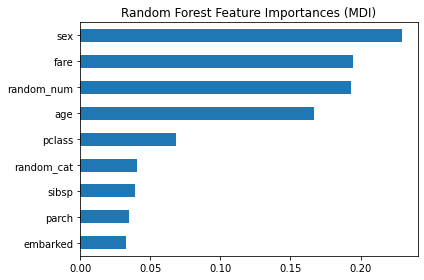

In [15]:
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

Comme alternative, les importances de permutation de `rf` sont calculées sur un jeu de test retenu. Cela montre que la caractéristique catégorielle de faible cardinalité, `sex` et `pclass` sont les caractéristiques les plus importantes. En effet, permuter les valeurs de ces caractéristiques conduira à la plus grande diminution du score de précision du modèle sur l'ensemble de test.

Notez également que les deux caractéristiques aléatoires ont des importances très faibles (proche de 0) comme prévu.

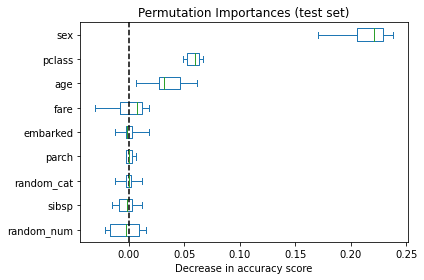

In [16]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

Il est également possible de calculer les importances des permutations sur l'ensemble d'apprentissage. Cela révèle que `random_num` et `random_cat` obtiennent un classement d'importance significativement plus élevé que lorsqu'ils sont calculés sur l'ensemble de test. La différence entre ces deux tracés est une confirmation que le modèle RF a une capacité suffisante pour utiliser ces caractéristiques numériques et catégorielles aléatoires pour sur-ajuster.

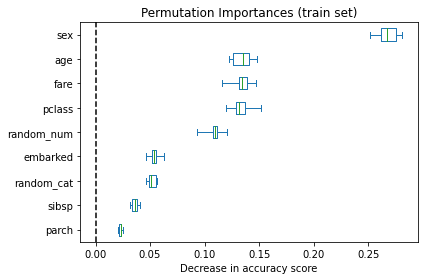

In [17]:
result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

Nous pouvons encore retenter l'expérience en limitant la capacité des arbres à sur-adapter en définissant `min_samples_leaf` à 20 points de données.

In [18]:
rf.set_params(classifier__min_samples_leaf=20).fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OrdinalEncoder(encoded_missing_value=-1,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['pclass', 'sex', 'embarked',
                                                   'random_cat']),
                                                 ('num', SimpleImputer(),
                                                  ['age', 'sibsp', 'parch',
                                                   'fare', 'random_num'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=20, random_state=42))])

En observant le score de précision sur l'ensemble d'entraînement et de test, nous observons que les deux métriques sont maintenant très similaires. Par conséquent, notre modèle n'est plus surajusté. On peut alors vérifier les importances des permutations avec ce nouveau modèle.

In [19]:
print(f"RF train accuracy: {rf.score(X_train, y_train):.3f}")
print(f"RF test accuracy: {rf.score(X_test, y_test):.3f}")

RF train accuracy: 0.810
RF test accuracy: 0.832


In [20]:
train_result = permutation_importance(
    rf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
test_results = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_importances_idx = train_result.importances_mean.argsort()

In [21]:
train_importances = pd.DataFrame(
    train_result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
test_importances = pd.DataFrame(
    test_results.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

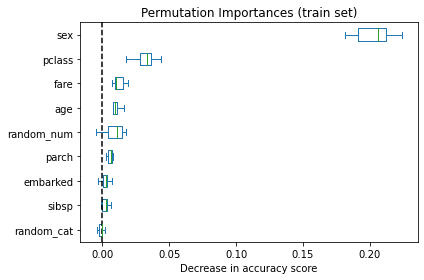

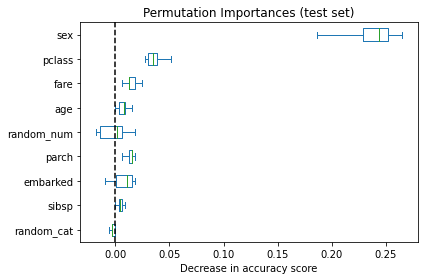

In [22]:
for name, importances in zip(["train", "test"], [train_importances, test_importances]):
    ax = importances.plot.box(vert=False, whis=10)
    ax.set_title(f"Permutation Importances ({name} set)")
    ax.set_xlabel("Decrease in accuracy score")
    ax.axvline(x=0, color="k", linestyle="--")
    ax.figure.tight_layout()

Maintenant, nous pouvons observer que sur les deux ensembles, les caractéristiques `random_num` et `random_cat` ont une importance moindre par rapport à la forêt aléatoire surajustée. Cependant, les conclusions concernant l'importance des autres caractéristiques sont toujours valables.

## Exemple B : [Importance de la permutation avec des entités multicolinéaires ou corrélées](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py)

Dans cet exemple, nous calculons l'importance de la permutation sur l'ensemble de données sur le cancer du sein du Wisconsin à l'aide de [`permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance). Le [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) peut facilement obtenir une précision d'environ 97 % sur un jeu de données de test. Étant donné que cet ensemble de données contient des entités multicolinéaires, l'importance de la permutation indiquera qu'aucune des entités n'est importante. Une approche pour gérer la multicolinéarité consiste à effectuer un regroupement hiérarchique sur les corrélations de classement Spearman des caractéristiques, en choisissant un seuil et en conservant une seule caractéristique de chaque groupe.

**NB** - Voir aussi [Permutation Importance vs Random Forest Feature Importance (MDI)](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py)

In [23]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

### Importance des caractéristiques de la forêt aléatoire dans les données sur le cancer du sein

Tout d'abord, nous entraînons une forêt aléatoire sur l'ensemble de données sur le cancer du sein et évaluons sa précision sur un ensemble de test :

In [24]:
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy on test data: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy on test data: 0.97


Ensuite, nous traçons l'importance des caractéristiques basées sur l'arbre et l'importance de la permutation. Le graphique de l'importance de la permutation montre que la permutation d'une caractéristique diminue la précision d'au plus `0.012`, ce qui suggère qu'aucune des caractéristiques n'est importante. Ceci est en contradiction avec la haute précision de test calculée ci-dessus : certaines caractéristiques doivent être importantes. L'importance de la permutation est calculée sur l'ensemble d'apprentissage pour montrer à quel point le modèle s'appuie sur chaque fonctionnalité pendant l'apprentissage.

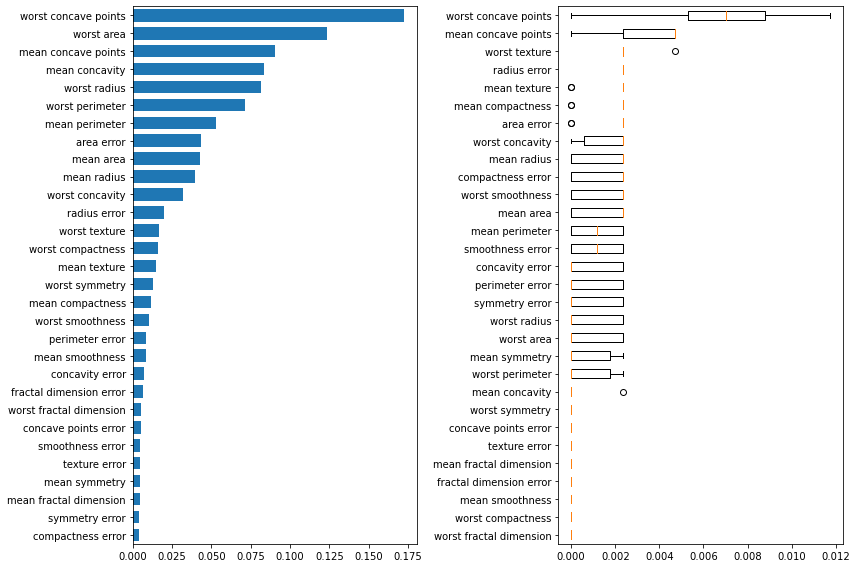

In [25]:
result = permutation_importance(clf, X_train, y_train, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(data.feature_names[tree_importance_sorted_idx])
ax1.set_ylim((0, len(clf.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=data.feature_names[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

### Gestion des entités multicolinéaires

Lorsque les entités sont colinéaires, la permutation d'une entité aura peu d'effet sur les performances du modèle car elle peut obtenir les mêmes informations à partir d'une entité corrélée. Une façon de gérer les caractéristiques multicolinéaires consiste à effectuer un regroupement hiérarchique sur les corrélations de classement de Spearman, en choisissant un seuil et en conservant une seule caractéristique de chaque groupe. Tout d'abord, nous traçons une carte thermique des caractéristiques corrélées :

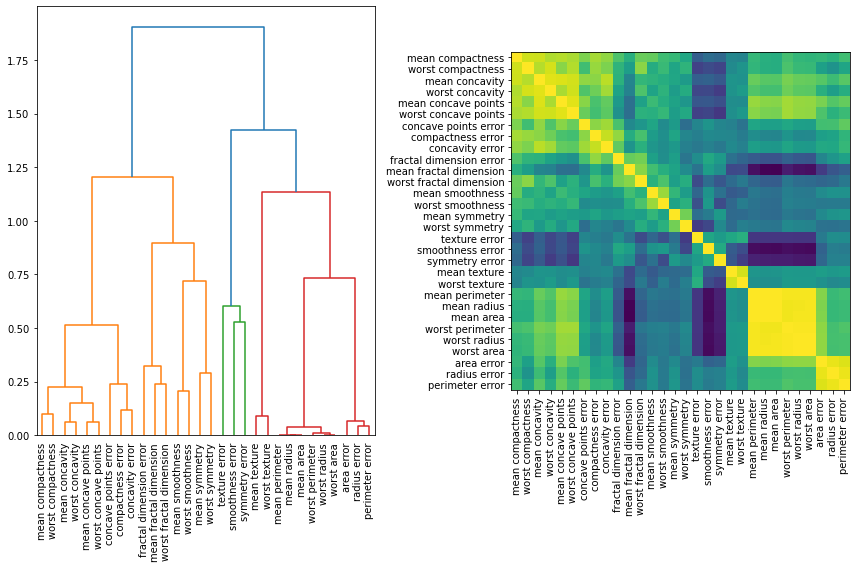

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=data.feature_names.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

Ensuite, nous choisissons manuellement un seuil par inspection visuelle du dendrogramme pour regrouper nos caractéristiques en clusters et choisir une caractéristique de chaque cluster à conserver, sélectionner ces caractéristiques dans notre ensemble de données et former une nouvelle forêt aléatoire. La précision du test de la nouvelle forêt aléatoire n'a pas beaucoup changé par rapport à la forêt aléatoire formée sur l'ensemble de données complet.

In [27]:
cluster_ids = hierarchy.fcluster(dist_linkage, 1, criterion="distance")
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

X_train_sel = X_train[:, selected_features]
X_test_sel = X_test[:, selected_features]

clf_sel = RandomForestClassifier(n_estimators=100, random_state=42)
clf_sel.fit(X_train_sel, y_train)
print(
    "Accuracy on test data with features removed: {:.2f}".format(
        clf_sel.score(X_test_sel, y_test)
    )
)

Accuracy on test data with features removed: 0.97


## Références

[1] L. Breiman, [“Random Forests”](https://link.springer.com/content/pdf/10.1023/A:1010933404324.pdf), Machine Learning, 45(1), 5-32, 2001.
